## SHARK TANK INDIA

## About Dataset

Dataset Name = Shark Tank India

Source = Kaggle(https://www.kaggle.com/datasets/shivavashishtha/shark-tank-india-dataset)

Description= Shark Tank India is a reality TV show where aspiring entrepreneurs pitch their business                ideas to a panel of successful investors, known as "sharks," with the aim of securing                  investment and support for their ventures.

Aim: The aim of Shark Tank India is to provide a platform for entrepreneurs to showcase their              innovative business ideas, receive valuable feedback and guidance from experienced investors, and      potentially secure funding to grow their businesses.


In [178]:
##importing some libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [179]:
#Load the dataset
df = pd.read_csv("Shark Tank India Dataset.csv")

In [98]:
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [4]:
df.tail()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
112,34,113,Green Protein,Plant-Based Protein,0,60.0,2.0,3000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
113,34,114,On2Cook,Fastest Cooking Device,0,100.0,1.0,10000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
114,35,115,Jain Shikanji,Lemonade,1,40.0,8.0,500.0,40.0,30.0,...,1,1,1,0,1,0,0,4,10.0,7.5
115,35,116,Woloo,Washroom Finder,0,50.0,4.0,1250.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
116,35,117,Elcare India,Carenting for Elders,0,100.0,2.5,4000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [5]:
df.columns

Index(['episode_number', 'pitch_number', 'brand_name', 'idea', 'deal',
       'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present',
       'aman_present', 'namita_present', 'vineeta_present', 'peyush_present',
       'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal',
       'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal',
       'total_sharks_invested', 'amount_per_shark', 'equity_per_shark'],
      dtype='object')

In [99]:
df.shape

(117, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [100]:
df.describe()

,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


## Cleaning Of Data

In [173]:
# Count the number of deals done
deals_done = df[df['deal'] == 1].shape[0]

# Count the number of deals not done
deals_not_done = df[df['deal'] == 0].shape[0]

print("Number of deals done:", deals_done)
print("Number of deals not done:", deals_not_done)


Number of deals done: 65
Number of deals not done: 52


In [127]:
#we are checking null values
df.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
112    False
113    False
114    False
115    False
116    False
Length: 117, dtype: bool

## Data Visualization

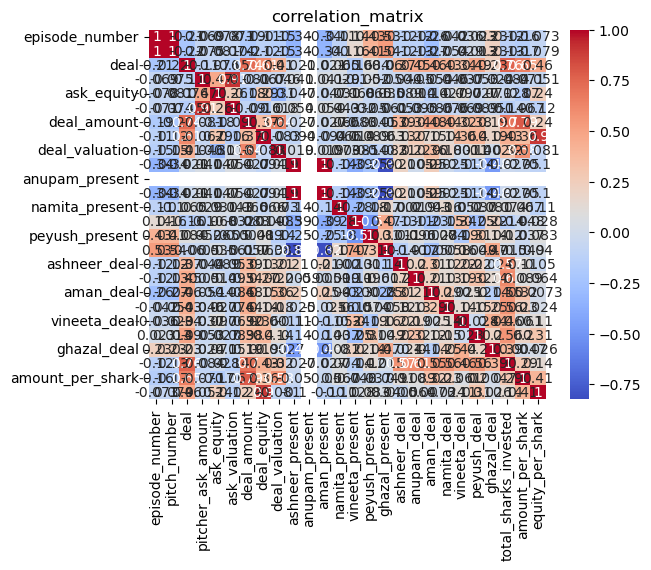

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("correlation_matrix")
plt.show()

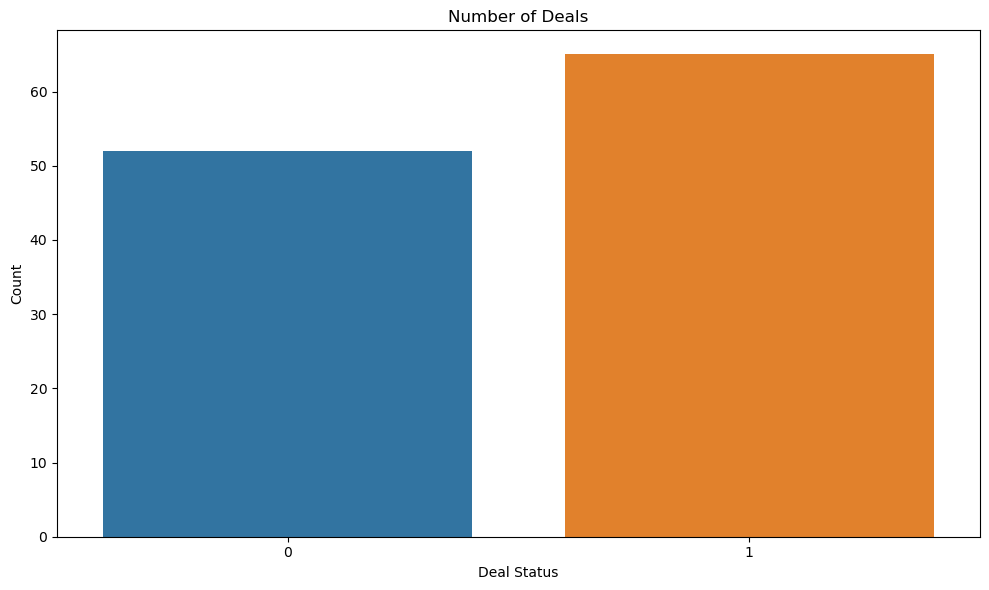

In [30]:
# Counting the number of deals for each shark
deal_counts = df['deal'].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=deal_counts.index, y=deal_counts.values)
plt.xticks(rotation=0)
plt.xlabel('Deal Status')
plt.ylabel('Count')
plt.title('Number of Deals')
plt.tight_layout()
plt.show()


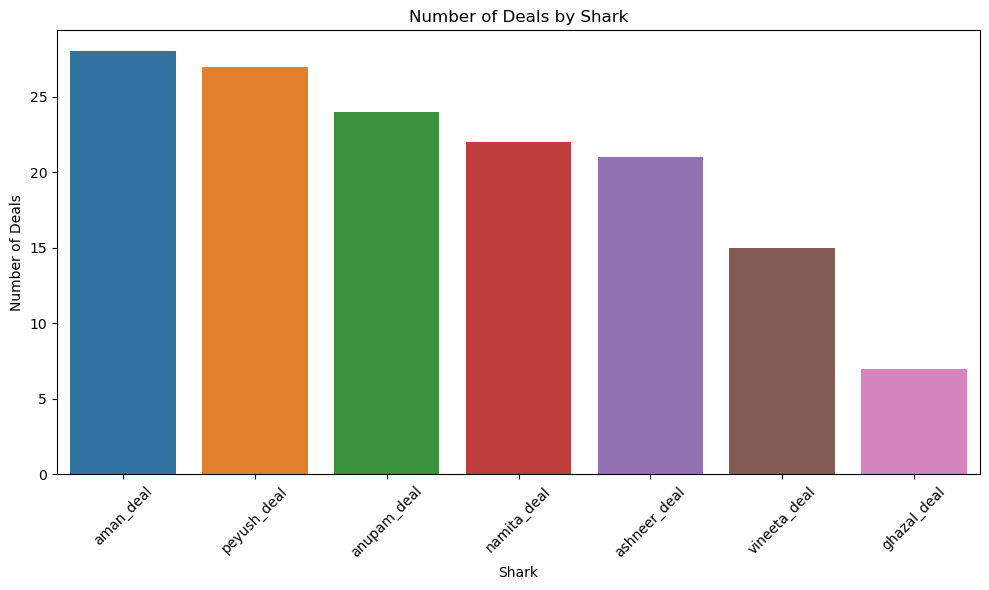

In [20]:
# Counting the number of deals for each person
deal_counts = df[['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal']].sum()

# Sorting the deal counts in descending order
deal_counts = deal_counts.sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=deal_counts.index, y=deal_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Shark')
plt.ylabel('Number of Deals')
plt.title('Number of Deals by Shark')
plt.tight_layout()
plt.show()


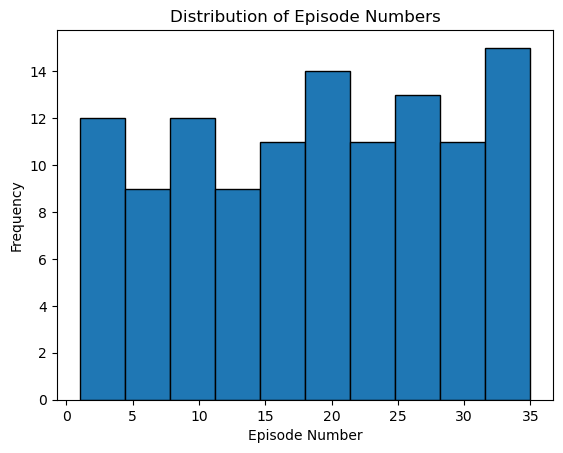

In [34]:
# Extracting the 'episode_number' column from the DataFrame
episode_numbers = df['episode_number']

# Creating a histogram
plt.hist(episode_numbers, bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Episode Number')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Numbers')

# Displaying the histogram
plt.show()


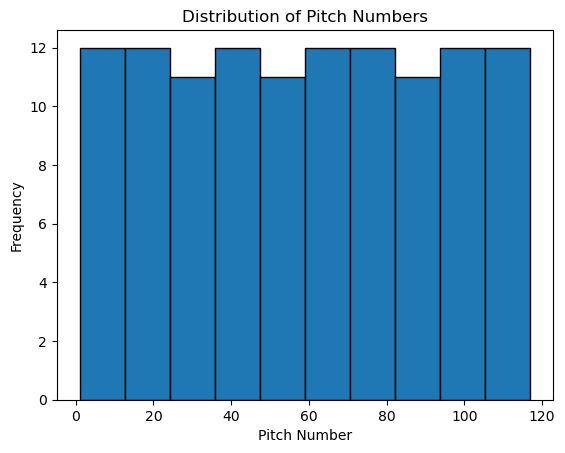

In [37]:
#Frequency of Pitch Numbers

pitch_numbers = df['pitch_number']
plt.hist(pitch_numbers, bins=10, edgecolor='black')
plt.xlabel('Pitch Number')
plt.ylabel('Frequency')
plt.title('Distribution of Pitch Numbers')
plt.show()

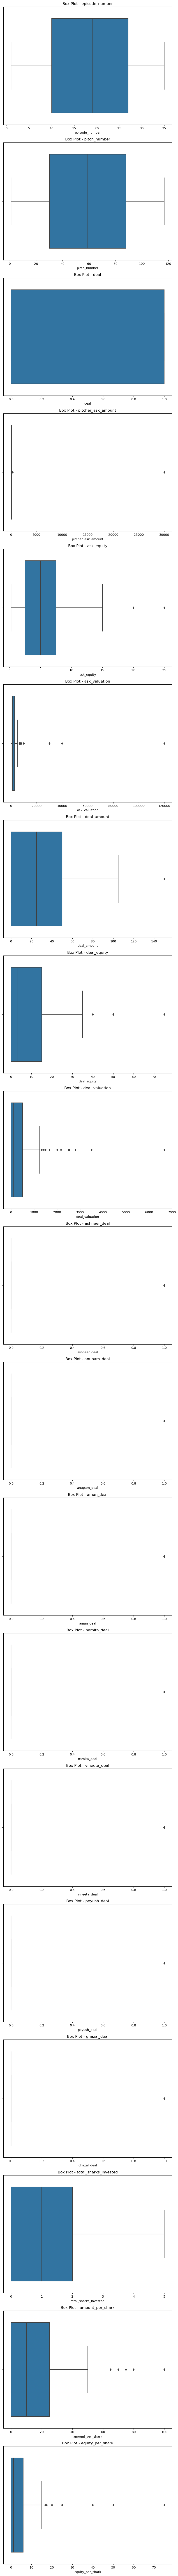

In [42]:


# Selecting the columns for outlier detection
columns = ['episode_number', 'pitch_number', 'deal', 'pitcher_ask_amount', 'ask_equity',
           'ask_valuation', 'deal_amount', 'deal_equity', 'deal_valuation', 'ashneer_deal',
           'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal',
           'ghazal_deal', 'total_sharks_invested', 'amount_per_shark', 'equity_per_shark']

# Creating subplots for each column
num_plots = len(columns)
fig, axs = plt.subplots(nrows=num_plots, figsize=(8, 6*num_plots))

# Iterating over each column
for i, col in enumerate(columns):
    # Creating a box plot for the column
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_title('Box Plot - {}'.format(col))

# Adjusting the layout and spacing
plt.tight_layout()

# Displaying the plots
plt.show()


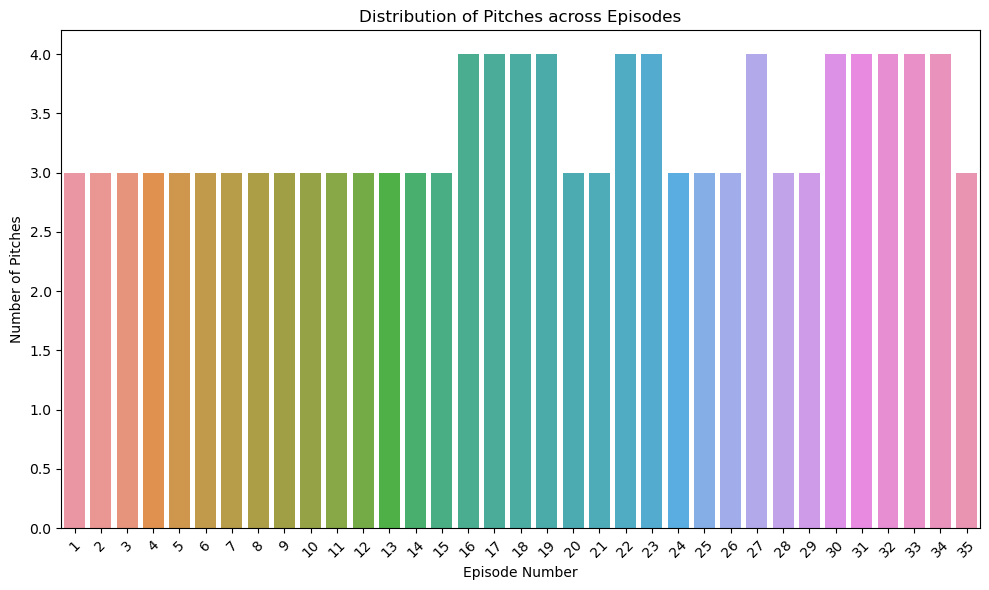

In [43]:
# Counting the number of pitches per episode
pitch_counts = df['episode_number'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=pitch_counts.index, y=pitch_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Episode Number')
plt.ylabel('Number of Pitches')
plt.title('Distribution of Pitches across Episodes')
plt.tight_layout()
plt.show()


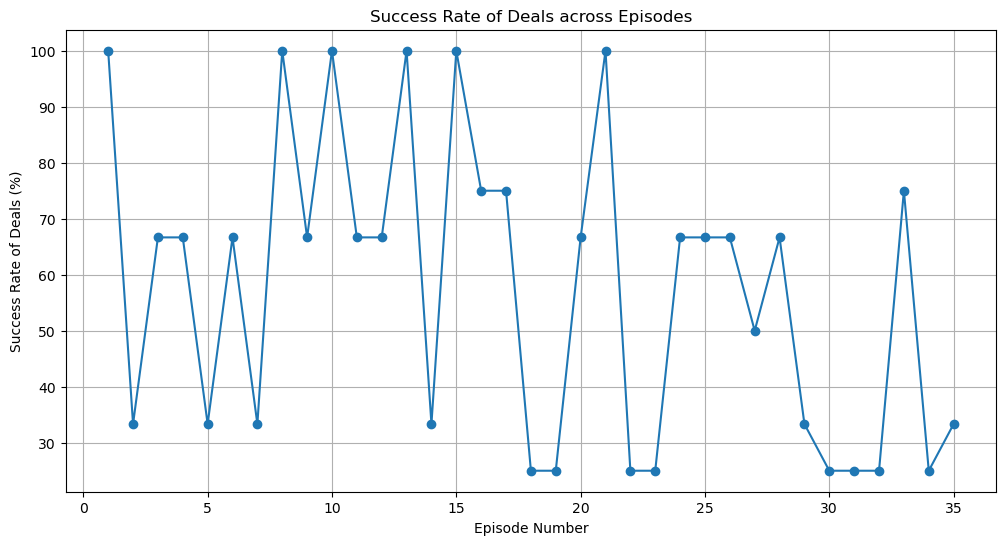

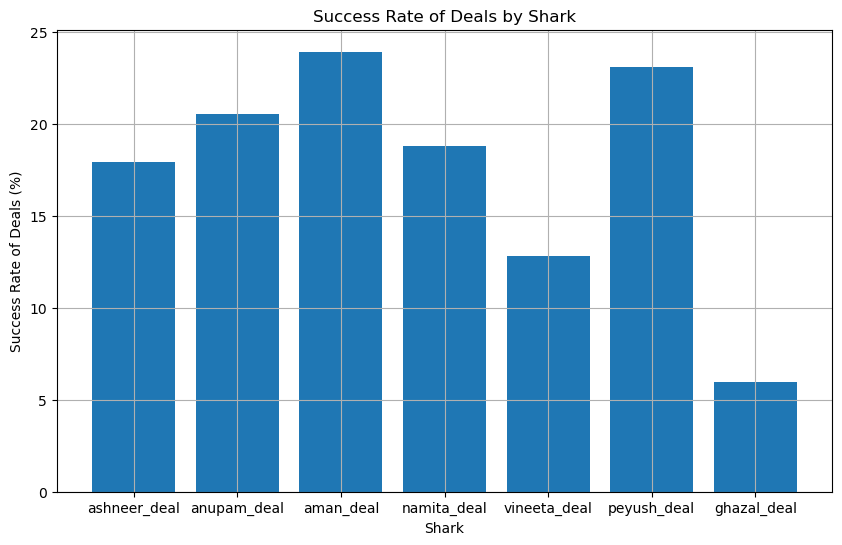

In [46]:
# Calculate the success rate of deals across episodes
episode_deal_counts = df.groupby('episode_number')['deal'].mean() * 100

# Plotting the success rate of deals across episodes
plt.figure(figsize=(12, 6))
plt.plot(episode_deal_counts.index, episode_deal_counts.values, marker='o')
plt.xlabel('Episode Number')
plt.ylabel('Success Rate of Deals (%)')
plt.title('Success Rate of Deals across Episodes')
plt.grid(True)
plt.show()

# Calculate the success rate of deals for each shark
shark_deal_counts = df[['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal']].mean() * 100

# Plotting the success rate of deals for each shark
plt.figure(figsize=(10, 6))
plt.bar(shark_deal_counts.index, shark_deal_counts.values)
plt.xlabel('Shark')
plt.ylabel('Success Rate of Deals (%)')
plt.title('Success Rate of Deals by Shark')
plt.grid(True)
plt.show()


In [174]:
# Calculate the success rate of deals across episodes
episode_deal_counts = df.groupby('episode_number')['deal'].mean() * 100
print("Success Rate of Deals across Episodes:")
print(episode_deal_counts)

# Calculate the success rate of deals for each shark
shark_deal_counts = df[['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal']].mean() * 100
print("Success Rate of Deals by Shark:")
print(shark_deal_counts)


Success Rate of Deals across Episodes:
episode_number
1     100.000000
2      33.333333
3      66.666667
4      66.666667
5      33.333333
6      66.666667
7      33.333333
8     100.000000
9      66.666667
10    100.000000
11     66.666667
12     66.666667
13    100.000000
14     33.333333
15    100.000000
16     75.000000
17     75.000000
18     25.000000
19     25.000000
20     66.666667
21    100.000000
22     25.000000
23     25.000000
24     66.666667
25     66.666667
26     66.666667
27     50.000000
28     66.666667
29     33.333333
30     25.000000
31     25.000000
32     25.000000
33     75.000000
34     25.000000
35     33.333333
Name: deal, dtype: float64
Success Rate of Deals by Shark:
ashneer_deal    17.948718
anupam_deal     20.512821
aman_deal       23.931624
namita_deal     18.803419
vineeta_deal    12.820513
peyush_deal     23.076923
ghazal_deal      5.982906
dtype: float64


## How do the valuation amounts vary for the deals made?

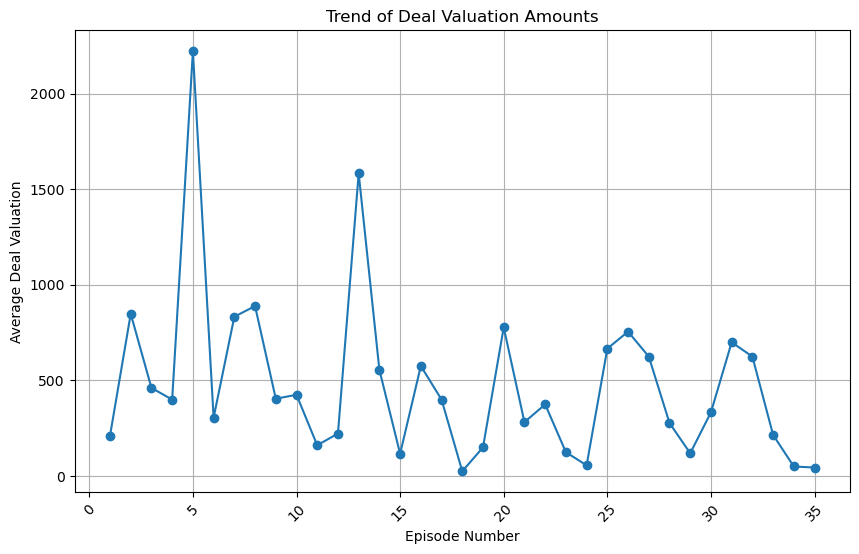

In [52]:
# Grouping the data by episode number and calculating the average deal valuation
avg_valuation = df.groupby('episode_number')['deal_valuation'].mean()

# Plotting the trend of deal valuation amounts
plt.figure(figsize=(10, 6))
plt.plot(avg_valuation.index, avg_valuation.values, marker='o')
plt.xlabel('Episode Number')
plt.ylabel('Average Deal Valuation')
plt.title('Trend of Deal Valuation Amounts')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


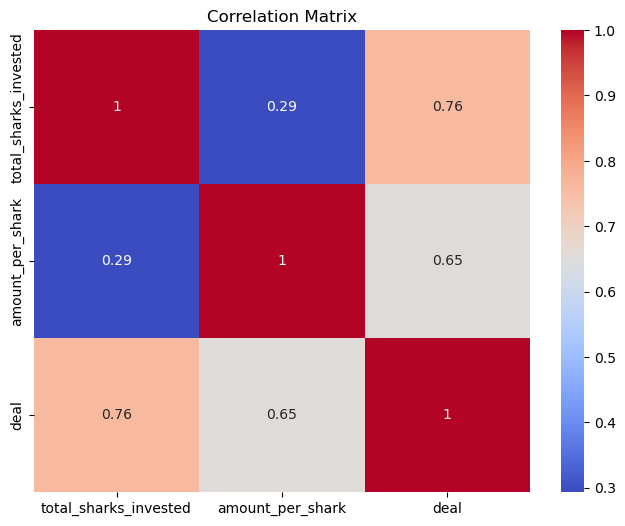

In [53]:
# Select the relevant columns for analysis
columns_of_interest = ['total_sharks_invested', 'amount_per_shark', 'deal']

# Create a subset of the DataFrame with the selected columns
subset = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


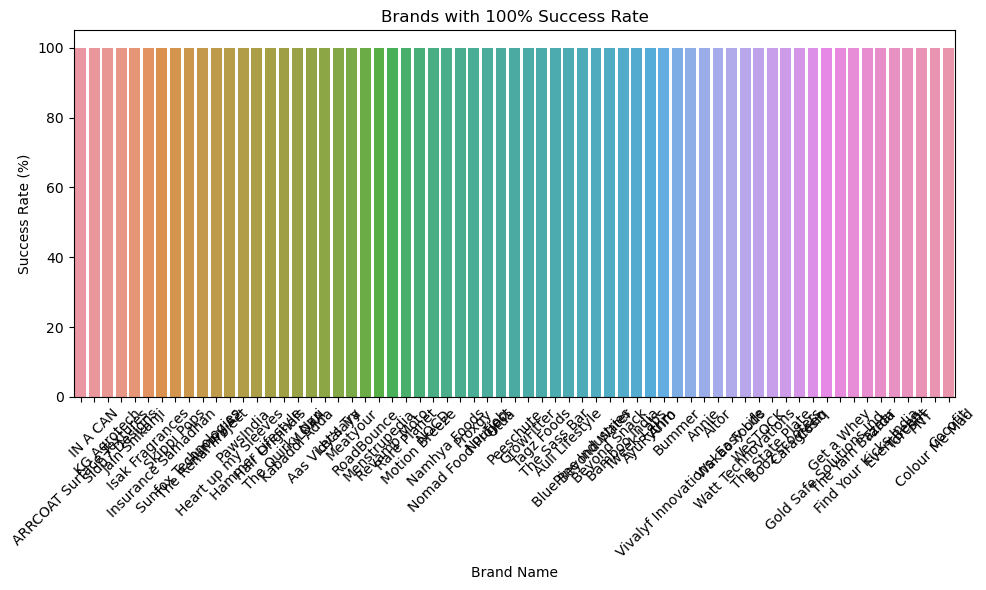

In [183]:
success_rates_100 = success_rates[success_rates == 100.0]
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rates_100.index, y=success_rates_100.values)
plt.xticks(rotation=45)
plt.xlabel('Brand Name')
plt.ylabel('Success Rate (%)')
plt.title('Brands with 100% Success Rate')
plt.tight_layout()
plt.show()


In [182]:
success_rates_100 = success_rates[success_rates == 100.0]
print(success_rates_100)


brand_name
ARRCOAT Surface Textures    100.0
IN A CAN                    100.0
KG Agrotech                 100.0
Sid07 Designs               100.0
Jain Shikanji               100.0
                            ...  
EventBeep                   100.0
Torch-it                    100.0
PNT                         100.0
Colour Me Mad               100.0
Cocofit                     100.0
Name: deal, Length: 65, dtype: float64


In [65]:
average_equity = df['ask_equity'].mean()
print("Average Equity Offered by Pitchers: ", average_equity)


Average Equity Offered by Pitchers:  5.188034188034188


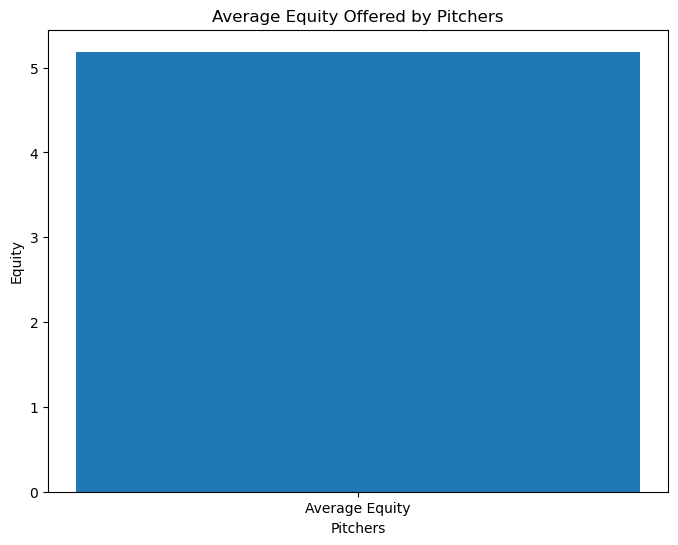

In [66]:
# Calculate the average equity offered by pitchers
average_equity = df['ask_equity'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar('Average Equity', average_equity)
plt.xlabel('Pitchers')
plt.ylabel('Equity')
plt.title('Average Equity Offered by Pitchers')
plt.show()


In [102]:
average_equity = df['deal_equity'].mean()
print("Average Equity Offered by Sharks: ", average_equity)


Average Equity Offered by Sharks:  8.963504273504274


## Conclusion

1.Aman Gupta, Peyush Bansal,Anupam Mittal are the most active sharks in terms of making deals.

2.16,17,18,19,22,23,27,30,31,32,33,34 no of episodes showing the higher number of pitches which means that more entrepreneurs presented their business ideas in those episodes compared to the rest.

3.The success rate of deals across episodes shows that in episodes 1, 8, 10, 13, 15, and 21, all the pitched business ideas received investments from the sharks, resulting in a 100% success rate

4.The success rates of deals by each shark on Shark Tank India are as follows:

   Ashneer: 17.95%

   Anupam: 20.51%

   Aman: 23.93%

   Namita: 18.80%

   Vineeta: 12.82%

   Peyush: 23.08%

   Ghazal: 5.98%

5.These are the Brand names with 100% Sucess rate 

   ARRCOAT Surface Textures    100.0

   IN A CAN                    100.0

   KG Agrotech                 100.0

   Sid07 Designs               100.0

   Jain Shikanji               100.0
 
   EventBeep                   100.0

   Torch-it                    100.0

   PNT                         100.0

   Colour Me Mad               100.0
 
   Cocofit                     100.0

## Train test split

In [145]:
# Define the features and target variable
features = ['episode_number', 'pitch_number', 'brand_name','deal',
       'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present',
       'aman_present', 'namita_present', 'vineeta_present', 'peyush_present',
       'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal',
       'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal',
       'total_sharks_invested', 'amount_per_shark', 'equity_per_shark' ]
target = 'deal'

# Extract the features and target variable from the DataFrame
X = df[features]
y = df[target]

In [146]:
X_train, X_test,y_train, y_test=train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [147]:
print("The Shape of X_train:", X_train.shape)
print("The Shape of X_test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)

The Shape of X_train: (93, 27)
The Shape of X_test: (24, 27)
The Shape of y_train: (93,)
The Shape of y_test: (24,)


## Encoding Technique

In [148]:
# Perform one-hot encoding on the 'brand_name' column
one_hot_encoded = pd.get_dummies(df['brand_name'])

# Concatenate the encoded columns with the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'brand_name' column
df_encoded.drop('brand_name', axis=1, inplace=True)


In [149]:
# Dropping the 'idea' and 'brand_name' columns
df.drop(['idea', 'brand_name'], axis=1, inplace=True)

## Normalization techniques

In [150]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your data
scaler.fit(df)

# Transform your data using the scaler
X_scaled = scaler.transform(df)



## Model Selection

### DecisionTreeClassifier

In [155]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



### LogisticRegression

In [163]:
# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.88      0.70      0.78        10

    accuracy                           0.83        24
   macro avg       0.84      0.81      0.82        24
weighted avg       0.84      0.83      0.83        24



### Naivebayes

In [165]:
# Create an instance of the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



### Random Forest

In [167]:
# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



### Support Vector Machine

In [168]:
# Create an instance of the SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.4166666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24



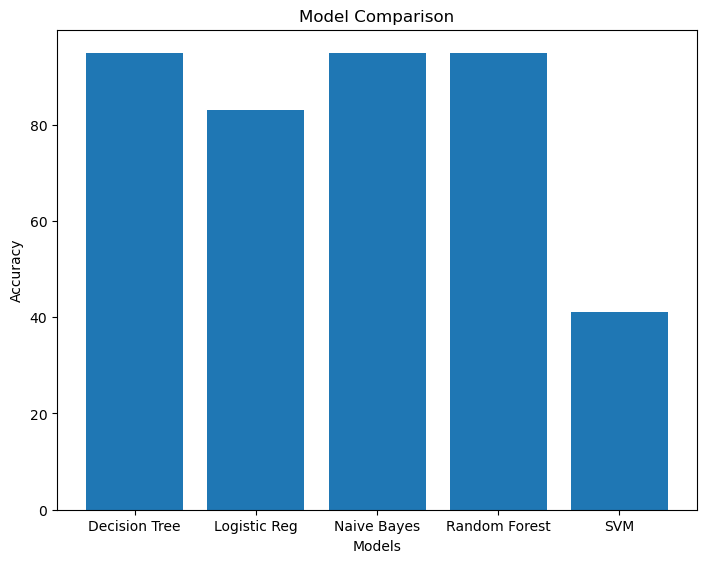

In [172]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])  # Create an axes object

langs = ['Decision Tree', 'Logistic Reg', 'Naive Bayes', 'Random Forest', 'SVM']
students = [95, 83, 95, 95, 41]

ax.bar(langs, students)  # Create the bar plot

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')

plt.show()  # Display the plot


## Thank You